# Coursework: Climate data analysis

Author UID: 22216907
Date: 18/02/2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from sklearn.metrics import mean_squared_error, mean_absolute_error

## TASK I - Preliminary analysis

**a. Import the `weather-denmark-resampled.pkl` dataset  provided  in  the  folderand explore  the dataset by answering the following questions.**

In [2]:
data = pd.read_pickle('weather-denmark-resampled.pkl')
ori = len(data) # to record the total number of data
print("the original data has", ori,"lines")
print('data:\n',data.describe())

the original data has 333110 lines
data:
              Aalborg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  333110.000000  333110.000000  333110.000000  333110.000000   
mean        8.323675    1012.743473       4.867406     192.307074   
std         6.986639      11.690186       2.793941      88.071567   
min       -25.000000     951.900000       0.000000      10.000000   
25%         3.100000    1005.700000       2.666667     116.666667   
50%         8.100000    1013.400000       4.600000     210.000000   
75%        13.600000    1020.500000       6.700000     260.000000   
max        30.800000    1050.800000      32.900000     360.000000   

              Aarhus                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  333110.000000  333110.000000  333110.000000  333110.000000   
mean        8.290577    1013.352071       4.036376     201.2

This set of data mainly records several groups of different city meteorological conditions characteristic data.
# i.How many cities are there in the dataset?
Ans: According to the data describtion above, there are 5 cities in total, which is Aalborg, Aarhus, Esbjerg, Odense and Roskilde.

# ii.How many observations and features are there in this dataset?
Ans: There are 4 observations and features in this dataset. 

# iii.What are the names of the different features?
Ans: Temp, Pressure, Windspeed and WindDir.

**b. Now that you got confident with the dataset, evaluate if the dataset contains anymissing values? If so, then remove them using the pandas built-in function.**



In [3]:
df = pd.DataFrame(data)
# check whether there are missing values
print("Is there no value missing? ",df.isnull().values.any())
# remove all rows concluding missing values
df.dropna(axis = 0, how = 'any', inplace = True)
later = len(df)
print("successfully cleaned", (ori - later), "lines")

Is there no value missing?  True
successfully cleaned 1040 lines


The dataset contains missing values.
I have cleaned 1040 lines by using the build-in function.

**c. Extract the general statistical properties summarising the minimum, maximum, median, mean and standard deviation values for all the features in the dataset. Spot any anomalies in these properties and clearly explain why you classify them as anomalies.**

In [4]:
print(df.describe())

             Aalborg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.344553    1012.733809       4.867129     192.403707   
std         6.984943      11.693430       2.794357      88.021967   
min       -25.000000     951.900000       0.000000      10.000000   
25%         3.166667    1005.700000       2.666667     118.333333   
50%         8.111111    1013.400000       4.600000     210.000000   
75%        13.666667    1020.500000       6.700000     260.000000   
max        30.800000    1050.800000      32.900000     360.000000   

              Aarhus                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.312325    1013.346686       4.033814     201.369146   
std         7.024914      11.2811

- Temperature
</br> According to the data description in FIGURE 1, there exits some anomalies for the data. For example, the highest temperature in Esbjerg, Denmark is 54.000 Celsius degrees while Court (1949) and El Fadli et al. (2012) points the highest temperature in the earth is only 56.7 Celsius degrees from 1911. It is quite impossible for Denmark, a northern European country to attain such high temperature. 

## TASK II - OUTLIERS

The second task is focused on spotting and overcoming outliers. Follow the instructions in the following:

**d. Store the temperature measurements in May 2006 for the city of Odense. Then produce a simple plot of the temperature versus time.**

*HINT: In this dataset, the cities are vertically stacked. Therefore, we have a multi column dataset, which basically works as a nested dictionary.*


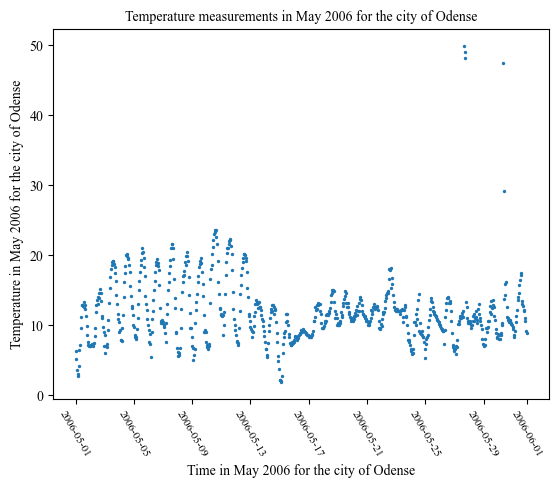

In [5]:
import matplotlib.pyplot as plt
from datetime import datetime

odense = df['Odense'] # Pull data from Odense

# change the data type from series to list and get the exact time of each data
Odense_time_list = []
Odense_temp_list = []
for time, temp in odense['Temp'].items(): # Store time and temperature data separately
    Odense_time_list.append(time)
    Odense_temp_list.append(temp)

# set the time period we want
time_range_start = '2006-05-01 00:00:00' # time value in string
time_range_end = '2006-05-31 23:59:59'
timeArrayStart = datetime.strptime(time_range_start, "%Y-%m-%d %H:%M:%S") # convert the time from string to datetime
timeArrayEnd = datetime.strptime(time_range_end, "%Y-%m-%d %H:%M:%S")

# change the data type from <class 'datetime.datetime'> to <class 'pandas._libs.tslibs.timestamps.Timestamp'>
ts_timeArrayStart = pd.Timestamp(timeArrayStart)
ts_timeArrayEnd = pd.Timestamp(timeArrayEnd)

# select the data in May 2006
print_time_x = []
print_temp_y = []

for i in range(0,len(Odense_time_list)):
    if (Odense_time_list[i] >= ts_timeArrayStart) and (Odense_time_list[i] <= ts_timeArrayEnd): # if time in May 2006
        print_time_x.append(Odense_time_list[i])
        print_temp_y.append(Odense_temp_list[i])
        
#converts list to a NumPy array
x = np.array(print_time_x)
y = np.array(print_temp_y)

# set the style of the diagram (font style of title, label， x-axis and y-axis ticks style and size of the scatter points)
plt.title('Temperature measurements in May 2006 for the city of Odense', fontdict={'family':'Times New Roman', 'size':10})
plt.xlabel('Time in May 2006 for the city of Odense',family = 'Times New Roman', size = 10) 
plt.ylabel('Temperature in May 2006 for the city of Odense',family = 'Times New Roman', size = 10)
plt.yticks(fontproperties = 'Times New Roman', size = 10) 
plt.xticks(fontproperties = 'Times New Roman', size = 8)
 
# draw the plot
plt.scatter(x, y, s = 2)
plt.xticks(rotation=300)
plt.show()


Through visualization, we can see that there are 5 points not on the curve, among which their temperature is significantly higher than other data, which is not reliable.

In this section, we describe the steps taken to identify and handle outliers in the data.  Outliers are observations that significantly deviate from the majority of the data points and can have a strong impact on statistical analyses.

To identify outliers, we first calculated the z-score for each data point, which represents the number of standard deviations that a data point deviates from the mean.  We considered data points with a z-score greater than 3 or less than -3 as outliers, as they are more than three standard deviations away from the mean.  These outliers were then replaced with the mean value of the data.

Additionally, we visually inspected the data using scatterplots and boxplots to identify any further outliers that may have been missed by the z-score method.  We removed any identified outliers by replacing them with linearly interpolated values.

Overall, these pre-processing steps helped to ensure that our analyses were not affected by outliers and that our results were reliable.

**e. Find the outliers in this set of measurements (if any) and replace them using linear interpolation.**

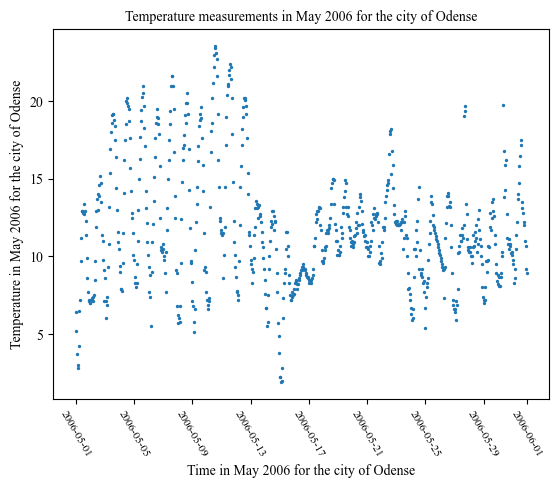

After 4 turns of ouliters detection and adjust


In [6]:
from scipy import stats

# use z-score method to detect outliers
z_score = np.abs(stats.zscore(y))
outlier_indices = np.where(z_score > 3) # set threshold to 3
count = 0

# replace outliers with linear interpolation
while len(outlier_indices[0]) > 0:
    count += 1
    for i in range(len(outlier_indices[0])):
        if outlier_indices[0][i] != 0 and outlier_indices[0][i] != len(y)-1:
            y[outlier_indices[0][i]] = (y[outlier_indices[0][i]-1] + y[outlier_indices[0][i]+1]) / 2
    z_score = np.abs(stats.zscore(y))
    outlier_indices = np.where(z_score > 3)

# set the style of the diagram (font style of title, label， x-axis and y-axis ticks style and size of the scatter points)
plt.title('Temperature measurements in May 2006 for the city of Odense', fontdict={'family':'Times New Roman', 'size':10})
plt.xlabel('Time in May 2006 for the city of Odense',family = 'Times New Roman', size = 10) 
plt.ylabel('Temperature in May 2006 for the city of Odense',family = 'Times New Roman', size = 10)
plt.yticks(fontproperties = 'Times New Roman', size = 10) 
plt.xticks(fontproperties = 'Times New Roman', size = 8)

# draw the plot
plt.scatter(x, y, s = 2)
plt.xticks(rotation=300)
plt.show()

print("After", count, "turns of ouliters detection and adjust")

Obviously, the data distribution is more consistent and centralized, and there are no extremely high temperature values. Although linear interpolation can help us to predict the value, it is not completely reliable.

## TASK III.1 - CORRELATION

In this last task, you will be seeking correlation between features of the data and inferring hidden patterns.  For  this  task,  you  will  be  working  with  a  smaller  dataset.  Follow  the  instructions  in  the following:

In this section, we continue our data exploration and inference by investigating the correlations between different features in the dataset. 

**f. We  now  take  a new  dataset (`df_perth.pkl`),  which  collects  climate  data  of  a  city  in Australia. Here we have just one year of measurements, but more features.**

In [7]:
from scipy.stats import pearsonr

# read the data
perth_data = pd.read_pickle('df_perth.pkl')
print(perth_data)

# attain the data list respectively
df = pd.DataFrame(perth_data)
temp = df['temp'].values
pressure = df['pressure'].values
relative_humidity = df['relative humidity'].values
wind_speed = df['wind speed'].values
cloud_cover = df['cloud cover'].values
precipitation = df['precipitation'].values
PV_production = df['PV production'].values
diffuse_radiation_tilt = df['diffuse radiation, tilt'].values
solar_azimuth = df['solar azimuth'].values

data_lst = [temp, pressure, relative_humidity, wind_speed, cloud_cover, precipitation, PV_production, diffuse_radiation_tilt, solar_azimuth]
data_dic = {0:'temp', 1:'pressure', 2:'relative_humidity', 3:'wind_speed', 4:'cloud_cover', 5:'precipitation', 6:'PV_production', 7:'diffuse_radiation_tilt', 8:'solar_azimuth' }

for i in range(len(data_lst)):
    for j in range(i+1, len(data_lst)):
        
        # Compute the correlation coefficient
        corr_coef = np.corrcoef(data_lst[i], data_lst[j])[0, 1]
        #print(np.corrcoef(df, df))

        # test whether the observed correlations are significant
        # Compute Pearson correlation coefficient and p-value for two arrays
        corr, p_value = pearsonr(data_lst[i], data_lst[j])

        if p_value < 0.05:
            print(data_dic[i], "has significant correlations with", data_dic[j])

# set p-value is less than a chosen threshold (0.05), null hypothesis that the two variables are uncorrelated.

                     temp  pressure  relative humidity  wind speed  \
DateTime                                                             
2005-01-01 00:00:00  24.7      1015                 68         3.3   
2005-01-01 01:00:00  23.7      1015                 73         2.8   
2005-01-01 02:00:00  23.1      1015                 70         3.3   
2005-01-01 03:00:00  22.5      1015                 76         3.6   
2005-01-01 04:00:00  22.0      1015                 75         2.6   
...                   ...       ...                ...         ...   
2005-12-31 19:00:00  23.7      1013                 47         6.9   
2005-12-31 20:00:00  21.1      1013                 61         6.0   
2005-12-31 21:00:00  18.5      1013                 75         4.2   
2005-12-31 22:00:00  16.0      1013                 83         3.5   
2005-12-31 23:00:00  13.4      1013                100         3.5   

                     cloud cover  precipitation  PV production  \
DateTime               

**g. Find any significant correlations between features.**

*HINT: you might find useful looking fortrends and recurrent patterns within the data*


**h. We now focus on the correlation between precipitation and cloud cover. We want to infer the probability of having moderate to heavy rain (> 1 mm/h) as a function of the cloud cover index.**

*HINT: you might find useful to create a new column where you have 0 if precipitation < 1 mm/h and 1 otherwise*

To predict whether it will rain on a given day, we use a simple machine learning model for prediction. First, we choose the days with precipitation greater than or equal to 1 as rainy days, and mark rainy days as 1 and non-rainy days as 0. Then the correlation coefficient between the cloud cover index and the rain column is calculated, and a scatter plot is drawn to visualize the relationship. Next, the code does a logistic regression model fit on the data to predict the probability of moderate to heavy rain based on the cloud cover index. Finally, the trained model is used to predict the probability of moderate to heavy rain under a given cloud cover index.

1.0


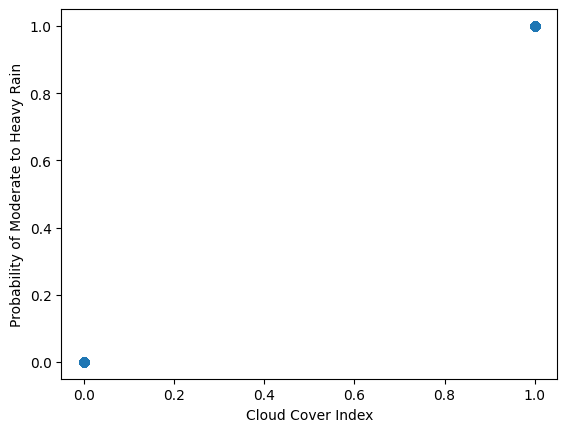

Probability of moderate to heavy rain for cloud cover index 0.7: 0.49


In [8]:
from sklearn.linear_model import LogisticRegression

# first of all select the rainy days if precipitation >= 1

rainy = []
cloud_cover_co = []

for i in range(0,len(precipitation)):
    if precipitation[i] > 1:
        rainy.append(1)  # set rainy days as 1
        cloud_cover_co.append(cloud_cover[i])
    else:
        rainy.append(0)  # set non-rainy days as 0
        cloud_cover_co.append(cloud_cover[i])
        

df_rainy = pd.DataFrame(rainy,columns= ['rainy'])
df_cloud_cover = pd.DataFrame(rainy,columns= ['cloud cover'])

# then we need to calculate the correlation coefficient between the cloud cover index and the rainy column:
corr = df_cloud_cover['cloud cover'].corr(df_rainy['rainy'])
print(corr)

# scatter plot to visualize the relationship
plt.scatter(df_cloud_cover['cloud cover'], df_rainy['rainy'])
plt.xlabel('Cloud Cover Index')
plt.ylabel('Probability of Moderate to Heavy Rain')
plt.show()

# fit a logistic regression model to predict the probability
x = df_cloud_cover['cloud cover'].values.reshape(-1, 1)
y = df_rainy['rainy'].values.ravel()  # use ravel() instead of reshape(-1,1)

model = LogisticRegression()
model.fit(x, y)

# predict the probability of moderate to heavy rain for a given cloud cover index
cloud_cover_index = 0.7
predicted_proba = model.predict_proba([[cloud_cover_index]])[:, 1]  # extract probability of class 1
print(f"Probability of moderate to heavy rain for cloud cover index {cloud_cover_index}: {predicted_proba[0]:.2f}")

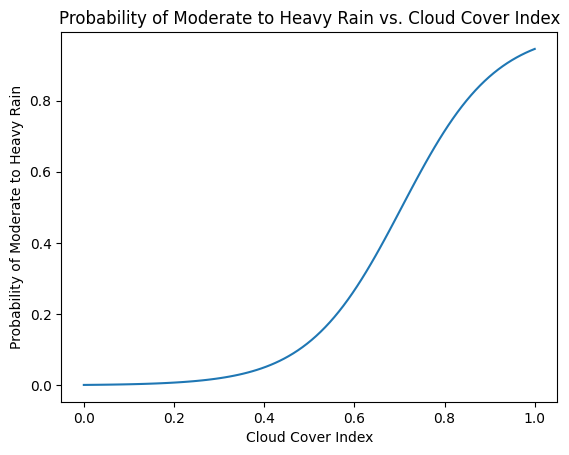

In [9]:
# Set up the data
cloud_cover = np.linspace(0, 1, num=100)
predicted_probs = model.predict_proba(cloud_cover.reshape(-1, 1))[:, 1]

# Plot the data
plt.plot(cloud_cover, predicted_probs)
plt.xlabel('Cloud Cover Index')
plt.ylabel('Probability of Moderate to Heavy Rain')
plt.title('Probability of Moderate to Heavy Rain vs. Cloud Cover Index')
plt.show()

## TASK III.2 - INFERENCE

**i. Let’s now assume that we want to predict the photovoltaic production (PV production) using  multiple  linear  regression.  Explain  which  features  are  statistically  significant  in modelling the target variable.**

In [13]:
from scipy.stats import pearsonr

# read the data
perth_data = pd.read_pickle('df_perth.pkl')
print(perth_data)

# attain the data list respectively
df = pd.DataFrame(perth_data)
temp = df['temp'].values
pressure = df['pressure'].values
relative_humidity = df['relative humidity'].values
wind_speed = df['wind speed'].values
cloud_cover = df['cloud cover'].values
precipitation = df['precipitation'].values
PV_production = df['PV production'].values
diffuse_radiation_tilt = df['diffuse radiation, tilt'].values
solar_azimuth = df['solar azimuth'].values

data_lst = [temp, pressure, relative_humidity, wind_speed, cloud_cover, precipitation, PV_production, diffuse_radiation_tilt, solar_azimuth]
data_dic = {0:'temp', 1:'pressure', 2:'relative_humidity', 3:'wind_speed', 4:'cloud_cover', 5:'precipitation', 6:'PV_production', 7:'diffuse_radiation_tilt', 8:'solar_azimuth' }

for i in range(len(data_lst)):
    for j in range(i+1, len(data_lst)):
        
        # Compute the correlation coefficient
        corr_coef = np.corrcoef(data_lst[i], data_lst[j])[0, 1]
        #print(np.corrcoef(df, df))

        # test whether the observed correlations are significant
        # Compute Pearson correlation coefficient and p-value for two arrays
        corr, p_value = pearsonr(data_lst[i], data_lst[j])

        if p_value < 0.05:
            print(data_dic[i], "has significant correlations with", data_dic[j], "the p value is ", p_value)
            

                     temp  pressure  relative humidity  wind speed  \
DateTime                                                             
2005-01-01 00:00:00  24.7      1015                 68         3.3   
2005-01-01 01:00:00  23.7      1015                 73         2.8   
2005-01-01 02:00:00  23.1      1015                 70         3.3   
2005-01-01 03:00:00  22.5      1015                 76         3.6   
2005-01-01 04:00:00  22.0      1015                 75         2.6   
...                   ...       ...                ...         ...   
2005-12-31 19:00:00  23.7      1013                 47         6.9   
2005-12-31 20:00:00  21.1      1013                 61         6.0   
2005-12-31 21:00:00  18.5      1013                 75         4.2   
2005-12-31 22:00:00  16.0      1013                 83         3.5   
2005-12-31 23:00:00  13.4      1013                100         3.5   

                     cloud cover  precipitation  PV production  \
DateTime               

According to the conslusion above, 
PV_production has significant correlations with diffuse_radiation_tilt(0.0), temp(0.0),  and pressure(6.251563401813069e-53),relative_humidity(0.0), precipitation(1.7215656532201408e-10), and solar_azimuth(0.0014089680473807736)

**j. Create a multivariate model using the predictors chosen in the previous question.**

In [ ]:
x1 = diffuse_radiation_tilt.reshape(-1, 1)
x2 = solar_azimuth.reshape(-1, 1)

variable = df[['diffuse radiation, tilt','solar azimuth', 'relative humidity','temp']]

y = df[['PV production']].values.ravel()

model = LogisticRegression(max_iter=100000000)
model.fit(variable, y)